In [2]:
import numpy as np
import overturemaps
from matplotlib.colors import LogNorm
from palettable.colorbrewer.sequential import Oranges_9

from lonboard import Map, PolygonLayer
from lonboard.colormap import apply_continuous_cmap
# from lonboard.basemap import CartoStyle, MaplibreBasemap

In [3]:
bbox = -74.02169, 40.696423, -73.891338, 40.831263

In [4]:
table = overturemaps.record_batch_reader("building", bbox).read_all()

In [5]:
heights = table["height"].to_numpy()
heights = np.nan_to_num(heights, nan=1)

In [6]:
normalizer = LogNorm(1, heights.max(), clip=True)
normalized_heights = normalizer(heights)

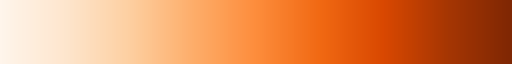

In [7]:
Oranges_9.mpl_colormap

In [8]:
colors = apply_continuous_cmap(normalized_heights, Oranges_9)

In [9]:
layer = PolygonLayer(
    # Select only a few attribute columns from the table
    table=table.select(["id", "height", "geometry", "names"]),
    extruded=True,
    get_elevation=heights,
    get_fill_color=colors,
)

/usr/local/lib/python3.12/site-packages/lonboard/_geoarrow/ops/reproject.py:40: UserWarning: No CRS exists on data. If no data is shown on the map, double check that your CRS is WGS84.
  warn(


In [11]:
# bmap = MaplibreBasemap(mode='reverse-controlled', style = CartoStyle.DarkMatter)
view_state = {
    "longitude": -73.98416810282863,
    "latitude": 40.72651721370669,
    "pitch": 45,
    "zoom": 12,
    "bearing": 13,
}
m = Map(layer, view_state=view_state)
# m.set_view_state(pitch=45)
m